- 인간의 뉴런
  - 시냅스를 통하여 여러 뉴런으로부터 자극을 전달 받음
  - 이를 종합하여 다른 뉴런에 자극을 전달
  
  
- 하나의 뉴런 : perceptron / 여러 layer를 통하여 시냅스를 표현
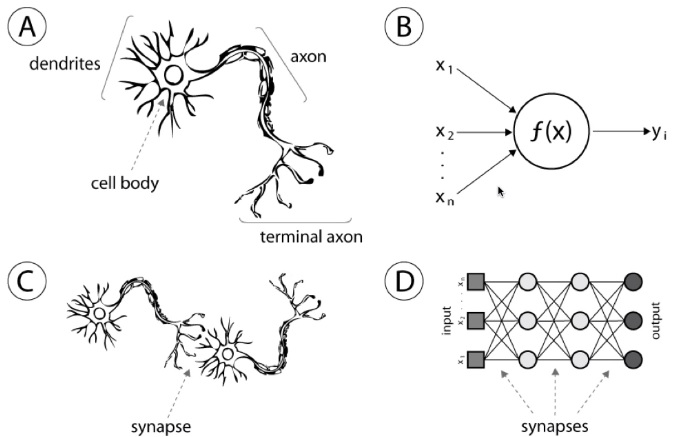

### Perceptron
- 하나의 뉴런
- 입력 데이터 혹은 다른 레이어의 출력물을 받아 결과값을 내는 구조
  - Input, weights, activation function(활성함수)로 구성
  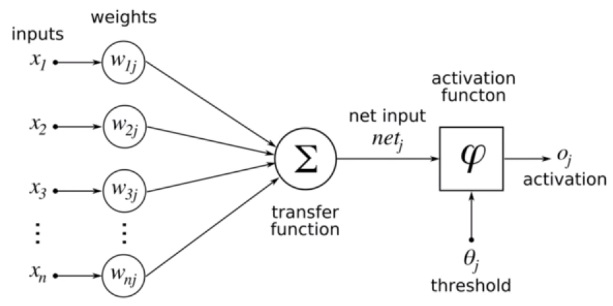

### Multi Layer Perceptron
  - 하나의 Hidden Layer(은닉노드)
    - 4 perceptron
  - 2개의 종속변수
    - 2 perceptron
    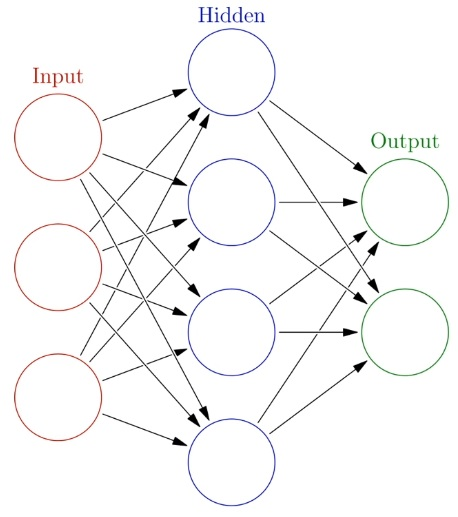

## Perceptron의 구조
- 2개의 입력변수 $X_1,X_2$라고 할 때
  - Transfer function : $w_1X_1+w_2X_2+w_0$
  - 각각의 입력변수에 **가중치(실수값)을 곱하고 더해주는** 형태
- 위의 값을 activation function에 넣어 출력값을 구해냄


- Activation function(활성함수)
  - 연속, 비선형, 단조증가, bounded(값의 대소 여부를 판별할 수 있음), 점근성의 특성
- 가장 기본적인 Activation function
  - **Step function, Sigmoid function**
    - 과거에는 Sigmoid function에 *결함이 있어서 약간의 정체기가 있었다고 한다.*
    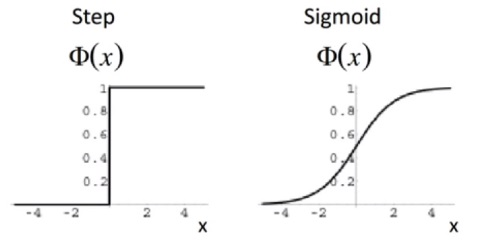

- 가장 기본적인 Activation function
  - Step function
    - $w_1X_1+w_2X_2+w_0\geq 0 \rightarrow Y=1$
    - $w_1X_1+w_2X_2+w_0<0 \rightarrow Y=0$
  - Sigmoid function : $\phi(x)=\frac{1}{1+e^{-x}}$
    - 딥러닝 이전에 많이 사용하던 함수
    - 장점 : 미분이 쉬움, 미분을 해도 자기 자신의 함수로 표현이 가능함

#### Activation function의 필요성
- 은닉 layer를 의미 있게 쌓아주는 역함
  - 선형의 layer만 쌓인다면, 결국 하나의 선형식인 된다.
- 출력값의 range 결정 기능
- classification에서 사용. regression에서는 다른 함수를 써야할 것이다.

### 신경망 모형의 구조 이해
- **Input layer, Hidden layer, Output layer**로 구성
  - **Input layer** : 입력 데이터
  - **Hidden layer**
    - 입력값 : 입력 데이터 혹은 또다른 Hidden layer의 출력값
    - 위의 입력값을 받는 perceptron들의 집합
    - Hidden layer는 여러 개/층이 있을 수 있다.
  - **Output layer**
    - 입력값 : 마지막 hidden layer의 출력값
    - 최종출력물을 만들어내는 perceptron들의 집합

## 바이너리 논리 연산과 perceptron 
- AND, OR, XOR 논리가 존재
- 속성이 2개인 경우 평면상의 직선으로 표현이 가능
  - $X_1,X_2$
  - $w_1X_1+w_2X_2+w_0=0$
- Perceptrond의 classification
  - 직선으로 분리되는 영역을 통하여 2-class problem을 해결
    - $w_1X_1+w_2X_2+w_0\geq 0 \rightarrow Y=1$
    - $w_1X_1+w_2X_2+w_0<0 \rightarrow Y=0$
    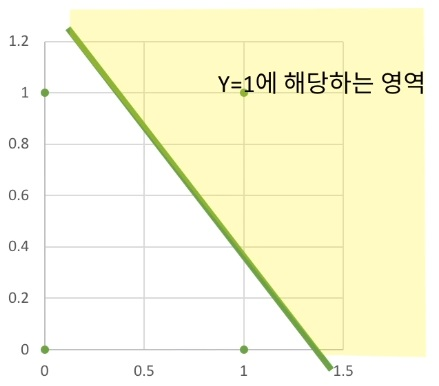

### AND 연산을 하는 perceptron
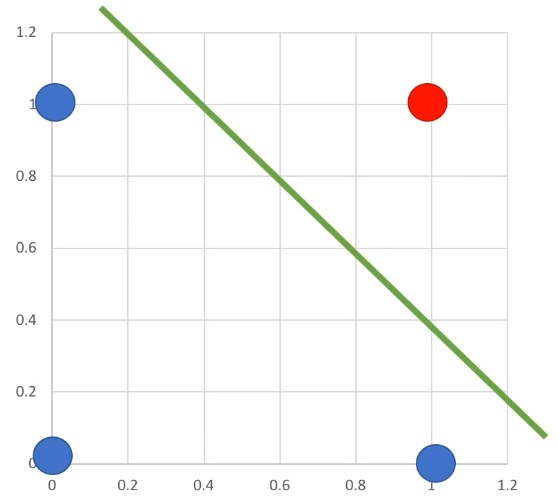

- 1을 red, 0을 blue로 표현
- 이를 만족할 수 있는 perceptron(직선)을 무수히 많이 그릴 수 있을 것
  - 이 중에서 가장 **이상적인 직선**을 찾아 그리는 것이 좋음
- **OR 연산 역시 perceptron을 그릴 수 있을 것이다.**

### 그렇다면 XOR은?
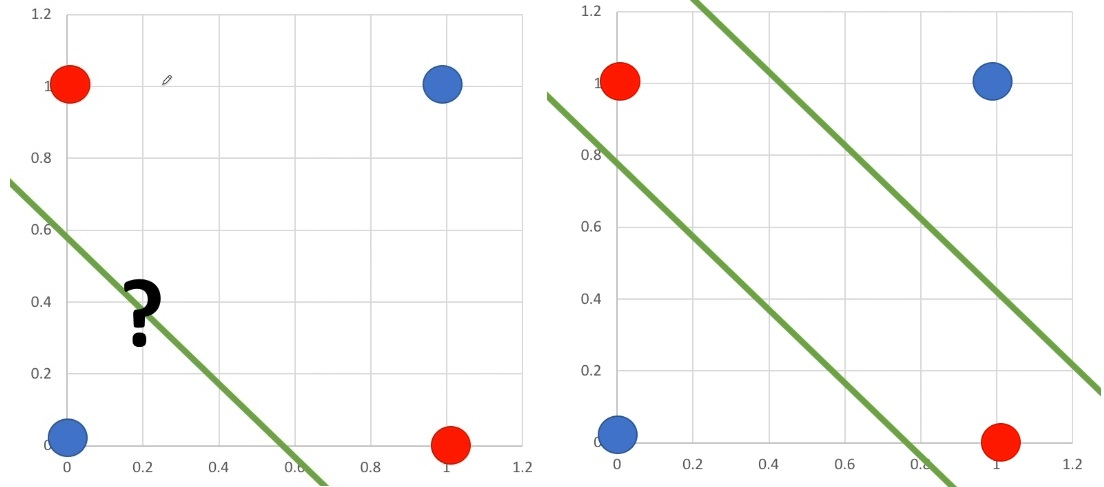
- **Perceptron을 통하여 분류할 수 없다.**
  - **Multi-layer perceptron(=Hidden layer)을 도입**
  - kernel을 통해 2차원의 형태로 만들어도 상관은 없다.

## 인조 뉴런 OR 연산 구축
- Weight 업데이트 알고리즘
  - Gradient descent(경사하강법)
  - 초기값을 기준으로 조금씩 내려가면서 변화량의 차이를 알아내는 것
  - $w_i'=w_i+LR*E*X_i$
    - $LR$ : Learning Rate
      - 값이 너무 크면 정확한 해를 찾기 힘들고, 값이 너무 작으면 수렴하기까지의 시간이 오래 걸림
    - $E$ : Target-outcome
      - 정의된 error 값. 주로 실제 값과 예측값의 차이를 이용한다.
    - $X_i$ : 입력값
    - 에러가 적으면 값이 적게 변하기 때문에 그 변화량도 적어질 것이다.
    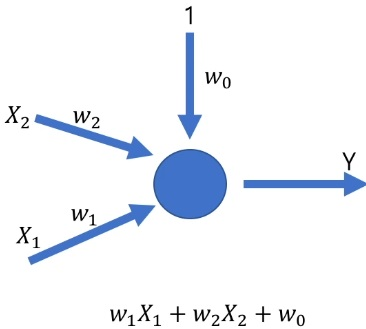

### 알고리즘 진행 과정
1. 임의의 $LR$값, 초기 $w_i$값 설정
2. 출력값을 계산
3. $E$의 계산
4. $w_i'$의 업데이트
5. 2~4 반복

### OR 연산을 기준으로 알고리즘 진행
1. $X_1, X_2$가 모두 0일 때 결과도 0이 나와야 함
  - $LR=0.2,w_1=0.1,w_2=0.2,w_0=-0.4$
    - Activation function : step function
  - 계산 : $(0.1)*0+0.2*0+-0.4*1=-0.4<0$
    - 출력값 : 0
  - $E=0-0=0$ : 수정없음

2. $X_1=0, X_2=1$이라면 1이 나와야 함
  - $LR=0.2,w_1=0.1,w_2=0.2,w_0=-0.4$
    - Activation function : step function
  - 계산 : $(0.1)*0+0.2*1+-0.4*1=-0.2<0$
    - 출력값 : 0
  - $E=1-0=0$ : **수정 발생**
    - $w_1'=0.1+0.2*1*0=0.1$
    - $w_2'=0.2+0.2*1*1=0.4$
    - $w_0'=-0.4+0.2*1*1=-0.2$
      - $w_i'=w_i+LR*E*X_i$ 식에 따라 값을 수정. 이후 다음 데이터로 넘어감
      - $w_0$은 항상 업데이트가 일어나기 때문에 1로 설정하는 것

3. $X_1=1, X_2=0$이라면 1이 나와야 함
  - $LR=0.2,w_1=0.1,w_2=0.4,w_0=-0.2$
    - Activation function : step function
  - 계산 : $(0.1)*1+0.4*0+-0.2*1=-0.1<0$
    - 출력값 : 0
  - $E=1-0=0$ : **수정 발생**
    - $w_1'=0.1+0.2*1*1=0.3$
    - $w_2'=0.4+0.2*1*0=0.4$
    - $w_0'=-0.2+0.2*1*1=0$
      - $w_i'=w_i+LR*E*X_i$ 식에 따라 값을 수정

3. $X_1=1, X_2=1$이라면 1이 나와야 함
  - $LR=0.2,w_1=0.3,w_2=0.4,w_0=0$
    - Activation function : step function
  - 계산 : $(0.3)*1+0.4*1+0*1=0.7\geq0$
    - 출력값 : 0
  - $E=1-0=0$ : **수정 없음**

4. **이후 다시 처음 $X_1,X_2$를 0으로 설정하여 처음부터 다시 시행**
  - 모두 적중하는 것을 알 수 있다. : 안정적인 Perceptron 생성